# HOSPITAL STAY PREDICTION

# IMPORTING NECESSARY LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# BASIC CHEKCS

In [5]:
df = pd.read_csv("C:\\Users\\aishu\\OneDrive\\Documents\\HealthCareAnalytics.csv")


In [6]:
df.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [7]:
df.tail(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,Nov-20,4752,0-10


In [8]:
df.shape

(318438, 18)

# EXAMINE THE DATA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

# STATISTICAL SUMMARY OF DATA

In [10]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [11]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

# CATAGORIES OF EACH COLUMN

In [12]:
df.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available_Extra_Rooms_in_Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed_Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type_of_Admission                         3
Severity_of_Illness                       3
Visitors_with_Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

# CHECKING NULL VALUES

In [13]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

* We observed that dataset contains null values in Bed_Grade and City_Code_Patient columns which are numerical and they are not relevant cols for predicting the healthcare outcomes , its better to drop them.

# EXPLORATORY DATA ANALYSIS

# TARGET VARIABLE DISTRIBUTION

In [14]:
df["Stay"].value_counts()

Stay
21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: count, dtype: int64

<Axes: xlabel='Stay'>

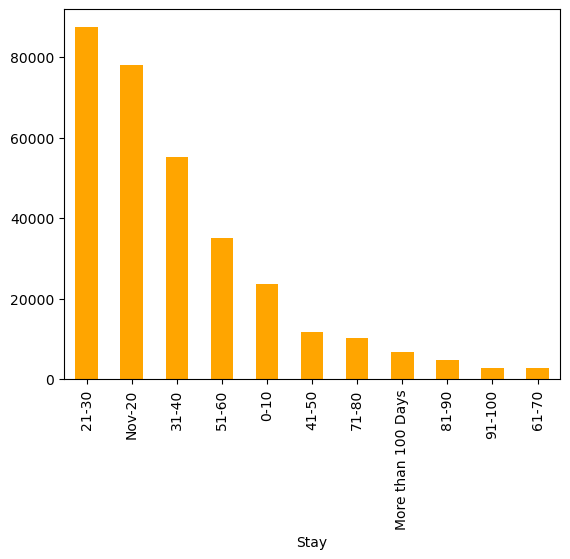

In [17]:
df.Stay.value_counts().plot(kind="bar",color="orange")

* So Most of the patients stay in hospital for 21-30 days, followed by 11-20, 31-40

<Axes: xlabel='Age', ylabel='count'>

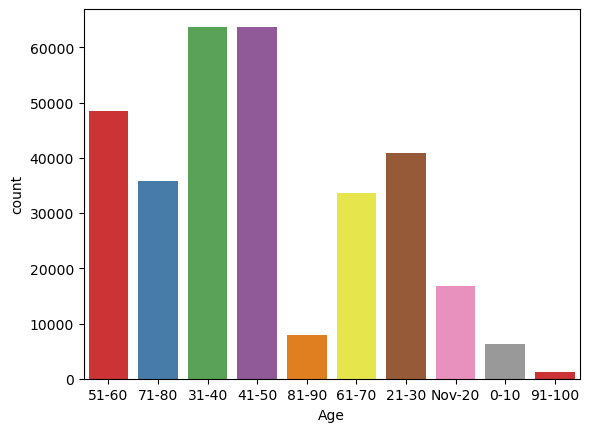

In [18]:
sns.countplot(df,x="Age",palette="Set1")

* Most of the patients admitting in hospitals is between 31-50 Age Group

# DATA PREPROCESSING

In [19]:
df=df.drop(['Hospital_region_code', 'Bed_Grade', 'patientid', 'City_Code_Patient'], axis = 1)

* By removing these columns, you're focusing the model on features that are more likely to have a direct influence on healthcare outcomes 

In [20]:
numeric=df.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical=df.select_dtypes(include=["object"]).columns.tolist()
print("Numerical columns:\n",numeric,"\n\n")
print("Categorical columns:",categorical)

Numerical columns:
 ['case_id', 'Hospital_code', 'City_Code_Hospital', 'Available_Extra_Rooms_in_Hospital', 'Visitors_with_Patient', 'Admission_Deposit'] 


Categorical columns: ['Hospital_type_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type_of_Admission', 'Severity_of_Illness', 'Age', 'Stay']


# CHECKING NULL VALUES

In [21]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

* Now there are no  missing values in data

In [22]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,3,radiotherapy,R,F,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,2,radiotherapy,S,F,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,2,anesthesia,S,E,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,2,radiotherapy,R,D,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,2,radiotherapy,S,D,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,3,radiotherapy,Q,F,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,2,anesthesia,Q,E,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,3,gynecology,R,F,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,3,anesthesia,Q,D,Trauma,Minor,5,Nov-20,3761,Nov-20


# LABEL ENCODING

In [23]:
for col in categorical:
    label=LabelEncoder()
    df[col]=label.fit_transform(df[col])

In [24]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,3,2,5,0,0,2,4,4911,0
1,2,2,2,5,2,3,3,5,1,0,2,4,5954,3
2,3,10,4,1,2,1,3,4,1,0,2,4,4745,2
3,4,26,1,2,2,3,2,3,1,0,2,4,7272,3
4,5,26,1,2,2,3,3,3,1,0,2,4,5558,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,3,3,1,5,0,2,3,3,4144,10
318434,318435,24,0,1,2,1,1,4,2,2,4,7,6699,2
318435,318436,7,0,4,3,2,2,5,0,1,3,6,4235,10
318436,318437,11,1,2,3,1,1,3,1,1,5,9,3761,10


* Now all are converted to numerical format 

In [25]:
orginal=df.copy()

* Severity  of Illness have 3 categories:
   
    *  0 -----Extreme
    *  1 -----Minor
    *  2 -----Moderate


<Axes: xlabel='Severity_of_Illness', ylabel='count'>

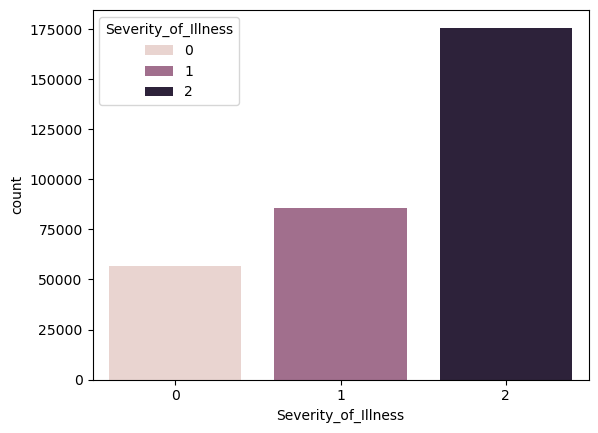

In [26]:
sns.countplot(df,x=df["Severity_of_Illness"],hue="Severity_of_Illness")

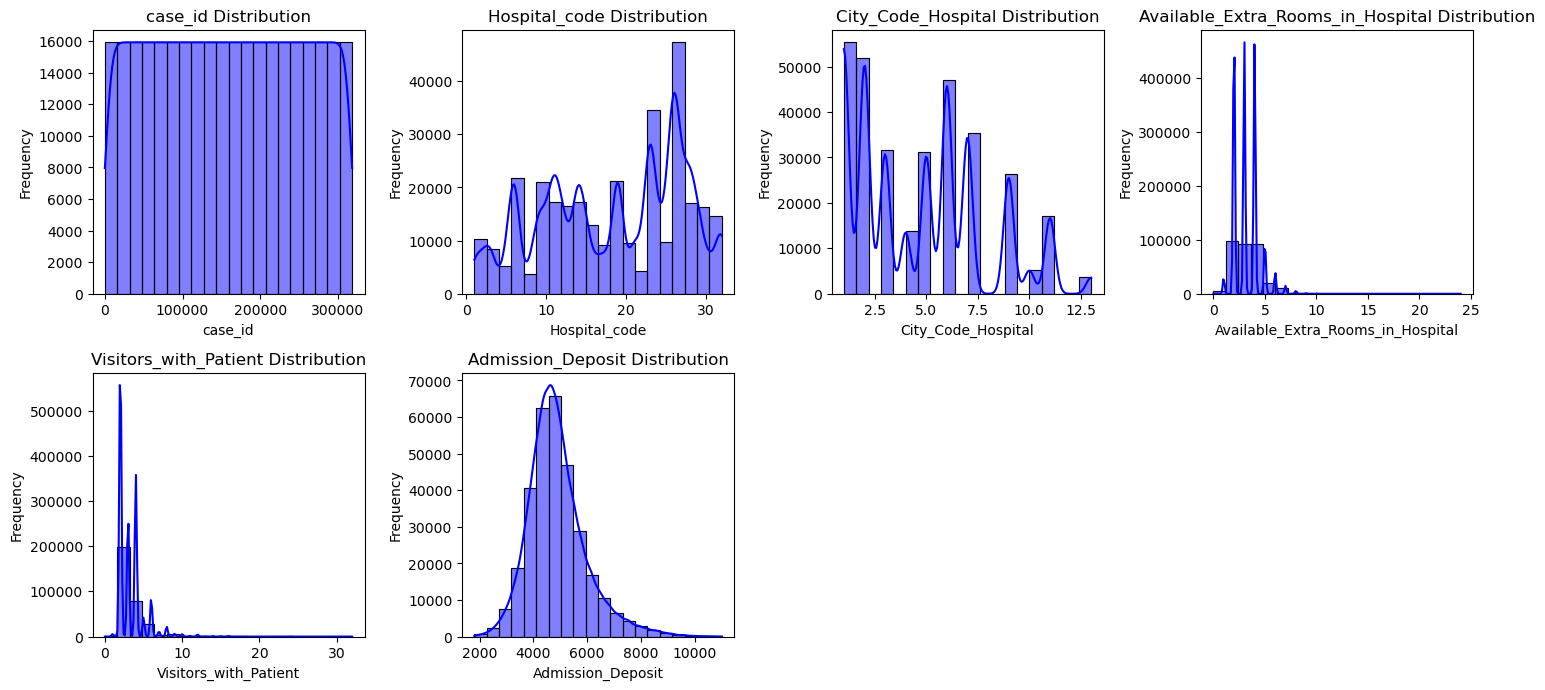

In [27]:
plt.figure(figsize=(15, 10))  
for i, col in enumerate(numeric, 1):
    plt.subplot(3, 4, i)  #  3 rows, 4 columns
    sns.histplot(df[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

* No column is following normal distribution, Admission_Deposit col is right Skewed , so I decided to scale the values using MinmaxScaler

# SCALING NUMARICAL COLUMS

In [28]:
scaler = MinMaxScaler()

# Apply scaling to the numerical columns
df[numeric] = scaler.fit_transform(df[numeric])

# Check the updated dataframe
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,0.000000,0.225806,2,0.166667,0.125000,3,2,5,0,0,0.0625,4,0.337858,0
1,0.000003,0.032258,2,0.333333,0.083333,3,3,5,1,0,0.0625,4,0.451129,3
2,0.000006,0.290323,4,0.000000,0.083333,1,3,4,1,0,0.0625,4,0.319831,2
3,0.000009,0.806452,1,0.083333,0.083333,3,2,3,1,0,0.0625,4,0.594266,3
4,0.000013,0.806452,1,0.083333,0.083333,3,3,3,1,0,0.0625,4,0.408123,3


# CHECKING CORRELATION

<Axes: >

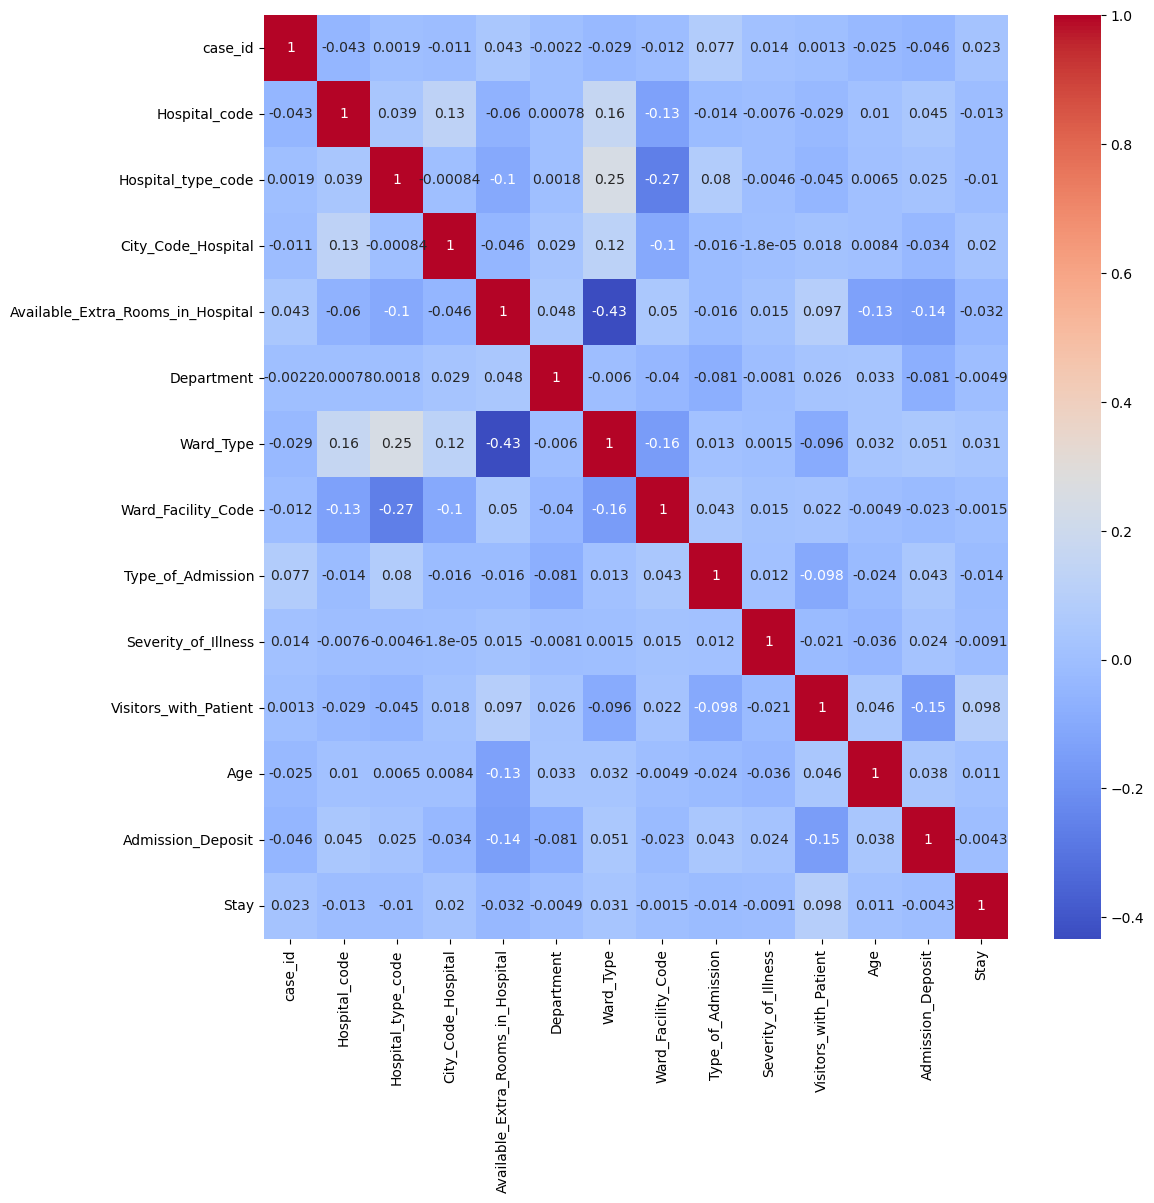

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#  CHECKING OUTIERS

In [30]:
for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(outliers)

         case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
3       0.000009       0.806452                   1            0.083333   
13      0.000041       0.258065                   3            0.333333   
15      0.000047       0.161290                   0            0.416667   
18      0.000057       1.000000                   5            0.666667   
20      0.000063       0.483871                   2            0.166667   
...          ...            ...                 ...                 ...   
318345  0.999711       0.709677                   0            0.416667   
318402  0.999890       0.870968                   1            0.833333   
318409  0.999912       0.935484                   2            0.166667   
318425  0.999962       0.451613                   2            0.333333   
318432  0.999984       0.806452                   1            0.083333   

        Available_Extra_Rooms_in_Hospital  Department  Ward_Type  \
3                              

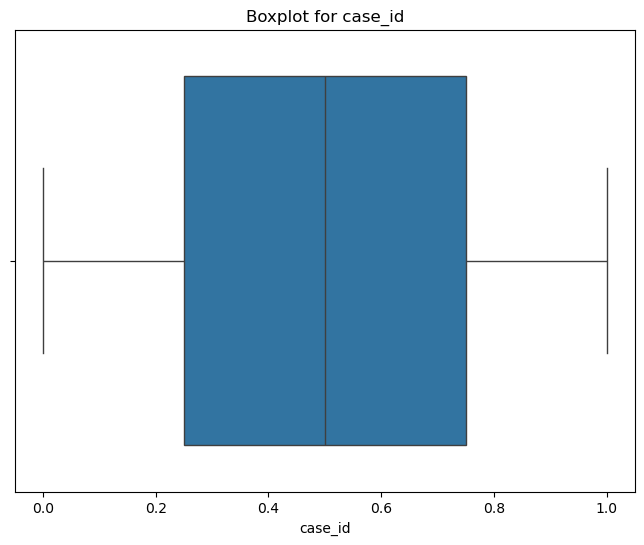

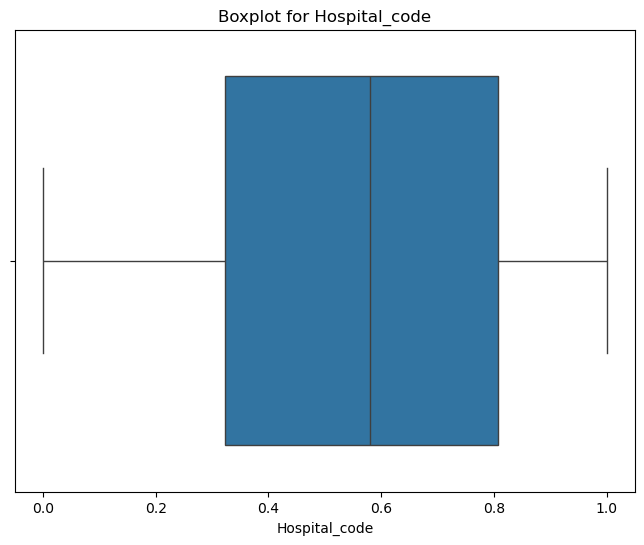

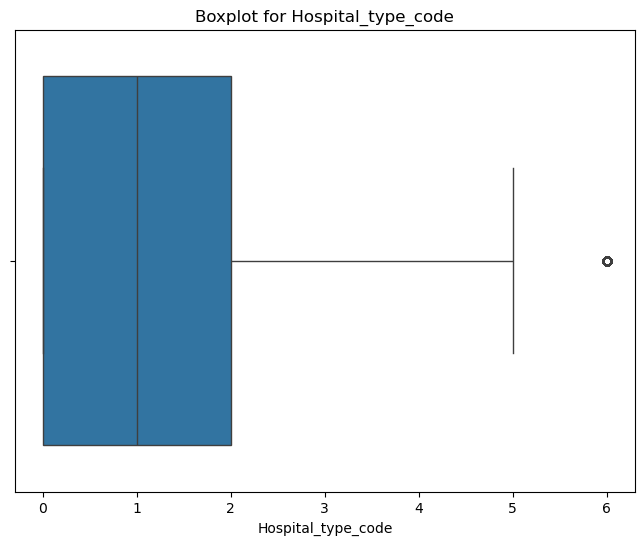

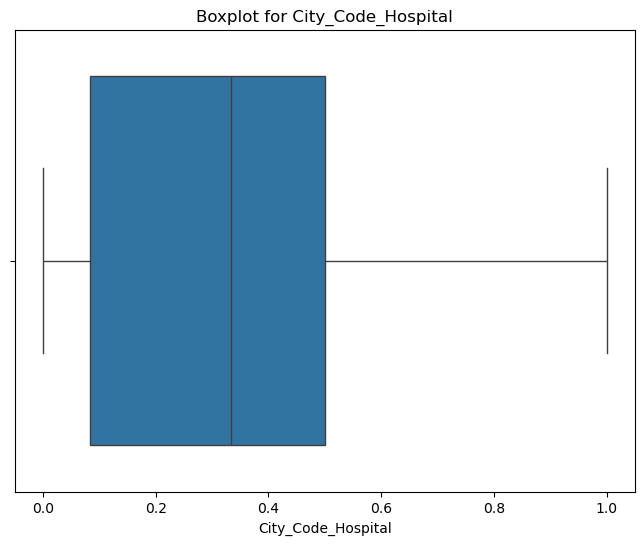

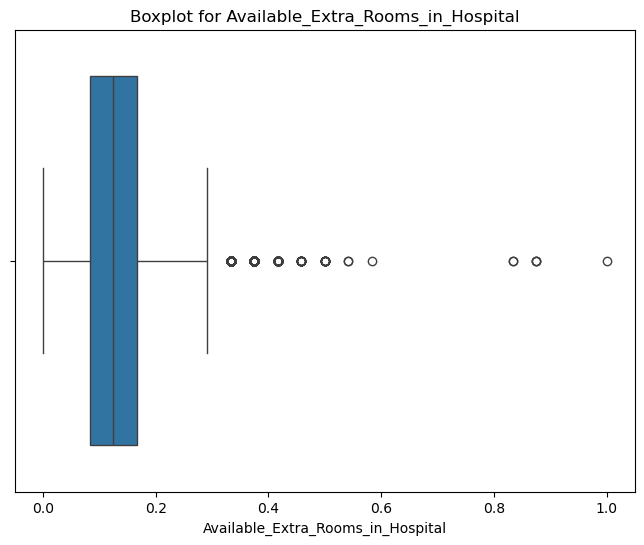

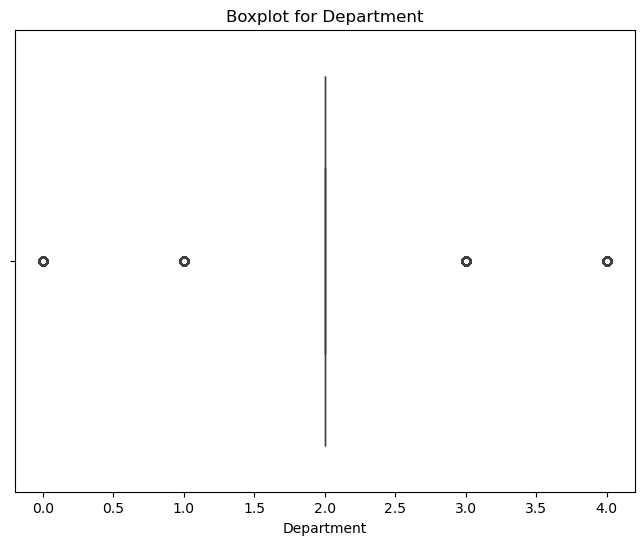

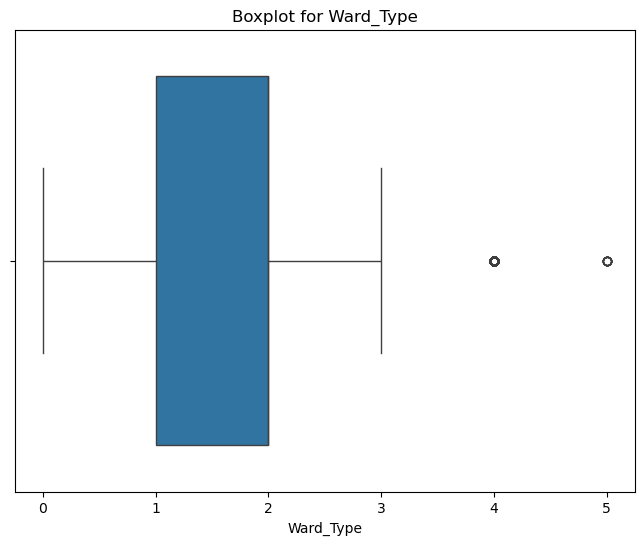

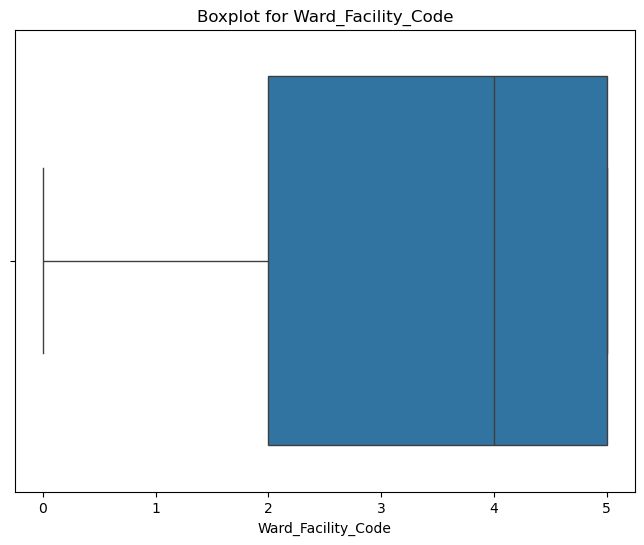

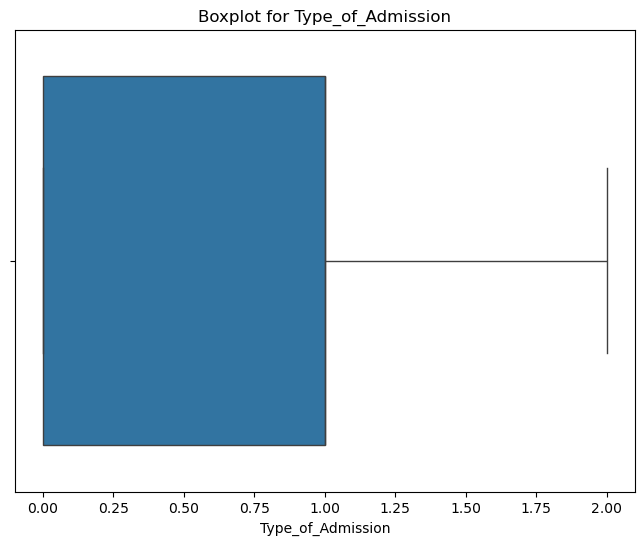

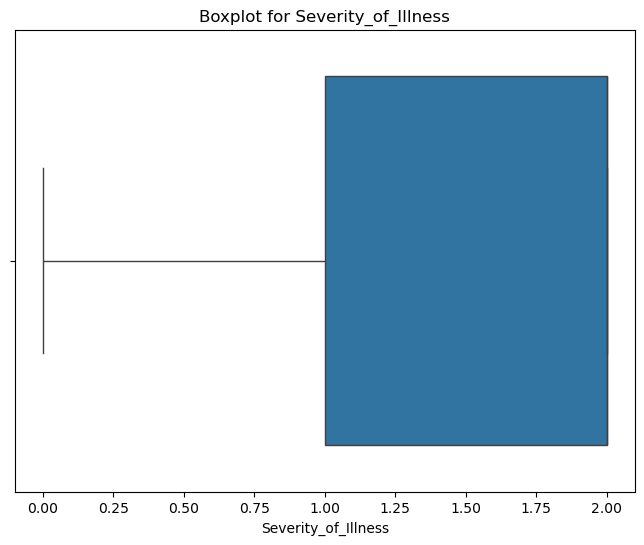

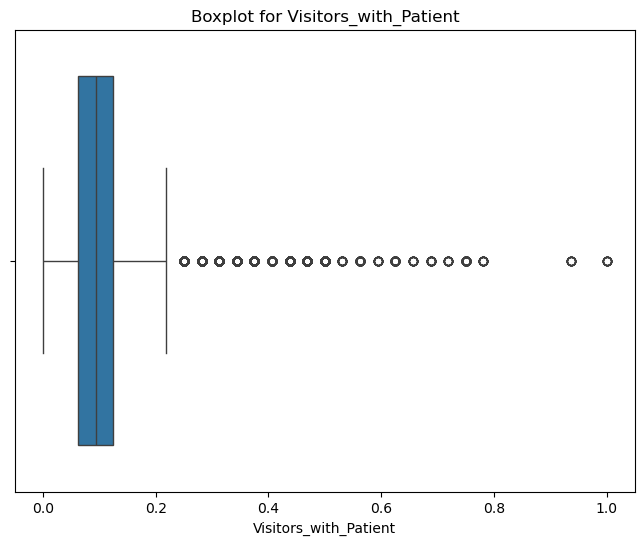

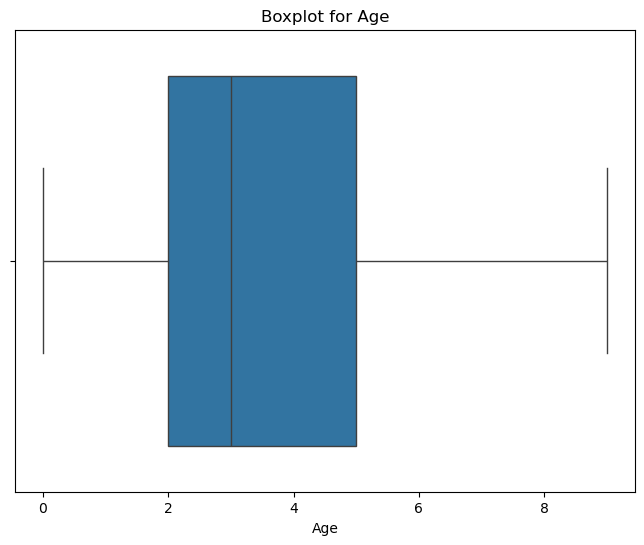

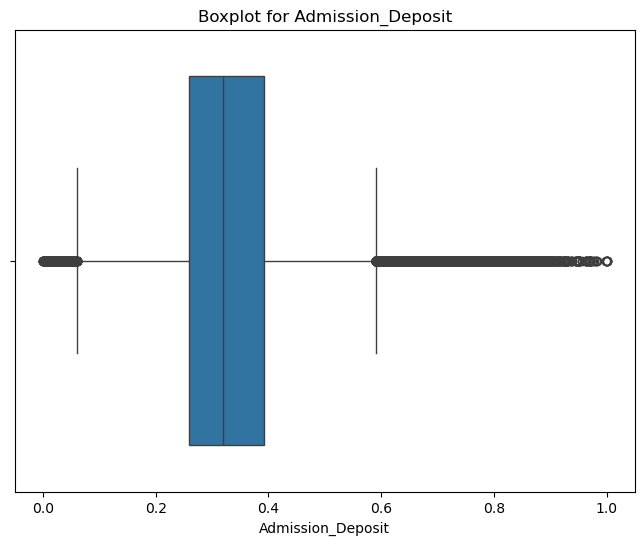

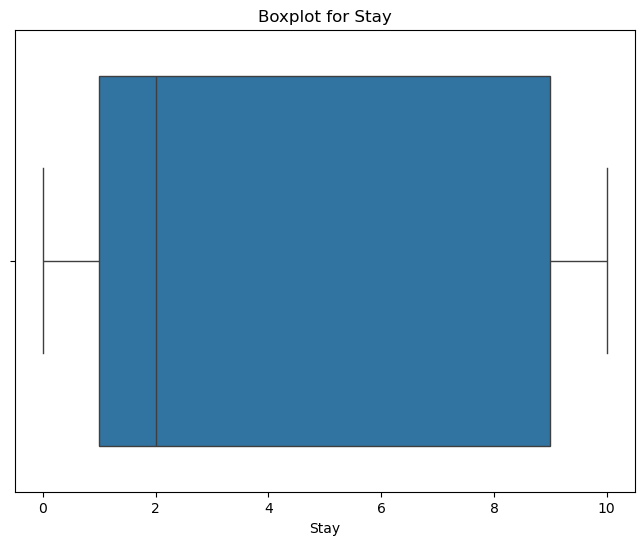

In [31]:
for col in outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

* We identified that outliers are there in columns and we need to detect the outliers by capping means Replace extreme values with upper or lower thresholds  

 # AFTER FILLING CHECKING OUTLIERS

In [32]:
def cap_outliers(df, columns):
    for col in columns:
        lower_limit = df[col].quantile(0.05)  # 5th percentile
        upper_limit = df[col].quantile(0.95)  # 95th percentile
        df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    return df

# List of numerical columns to cap
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply the capping function
df = cap_outliers(df, numerical_cols)


* Now checking whether outliers are filled or not

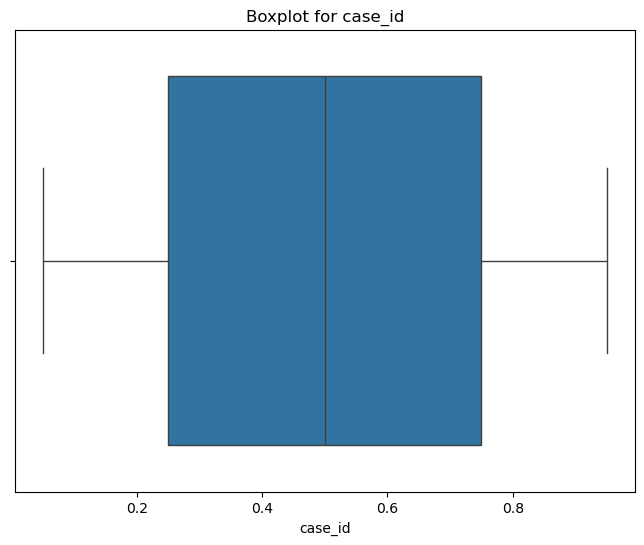

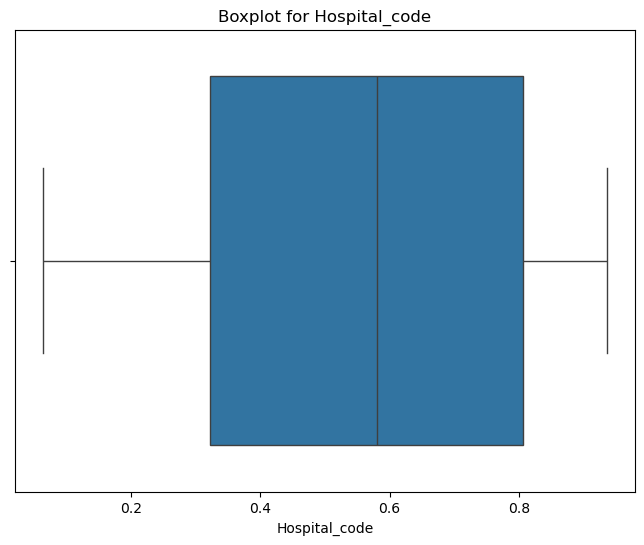

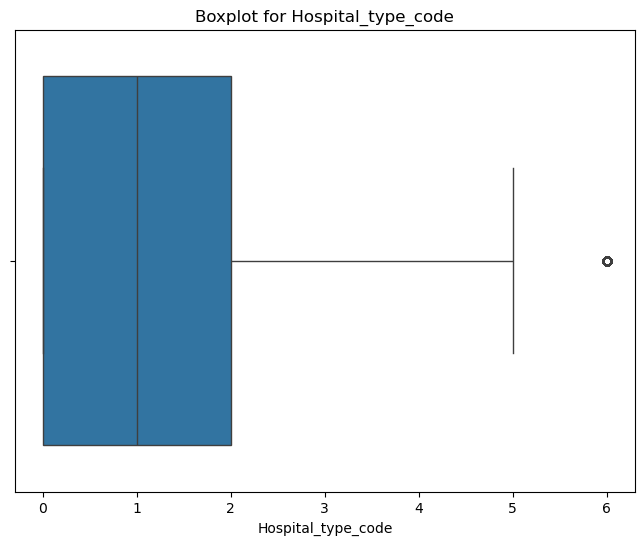

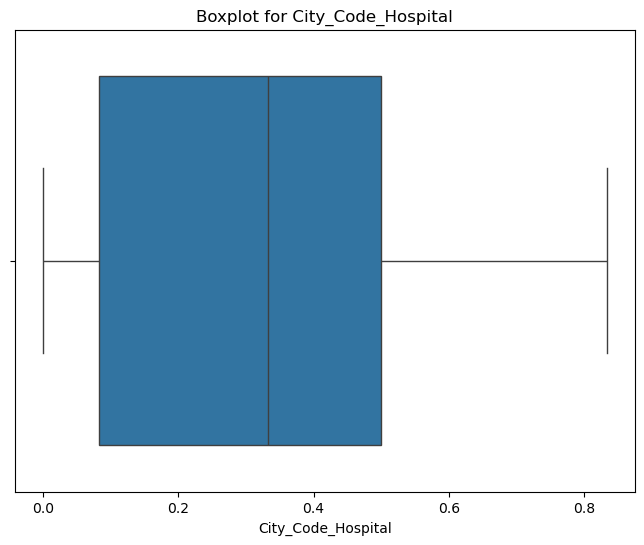

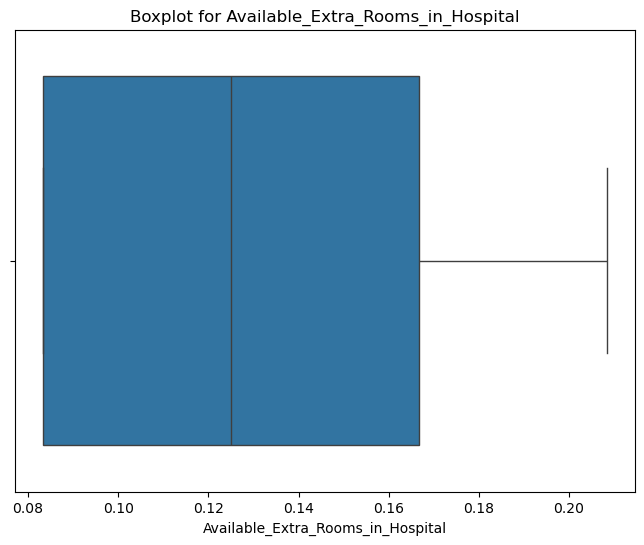

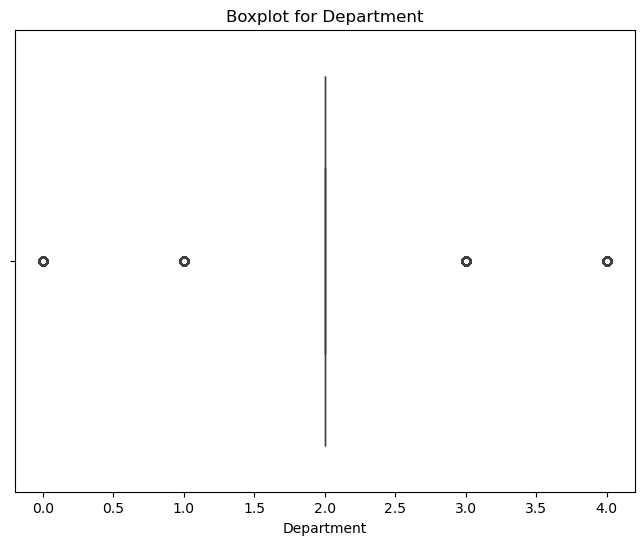

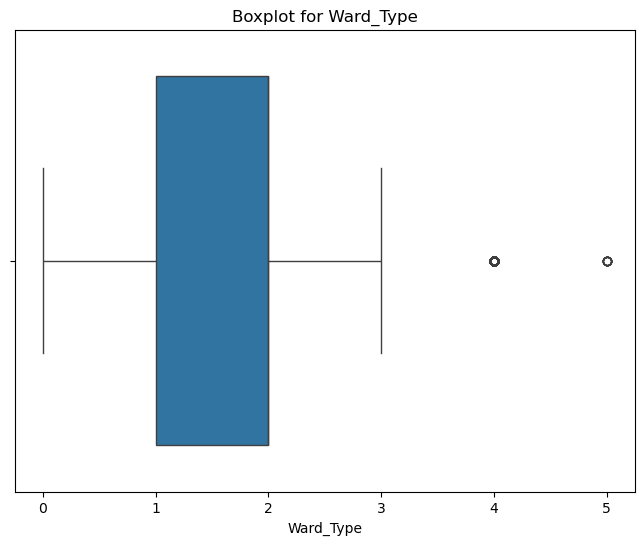

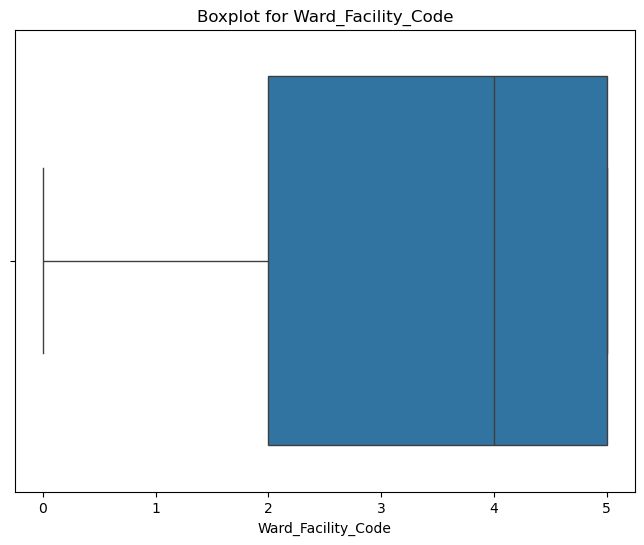

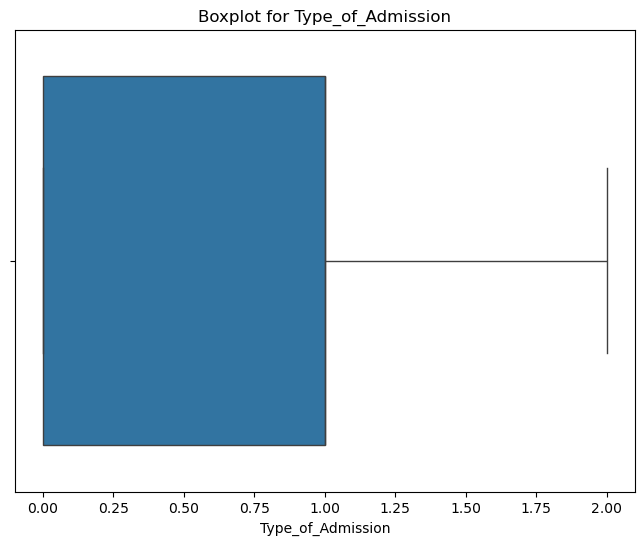

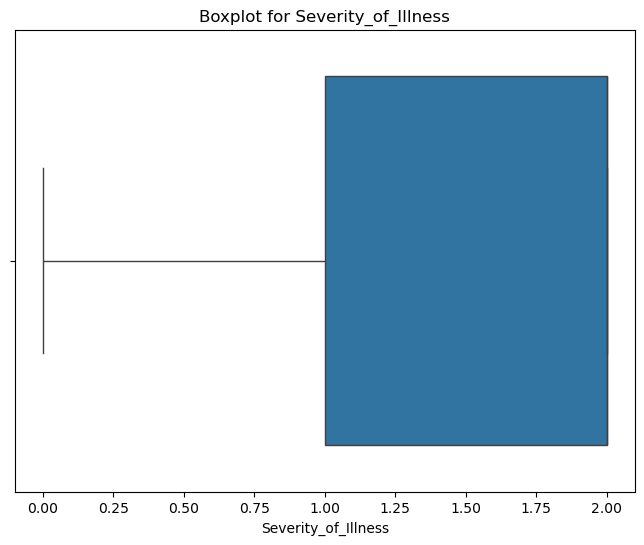

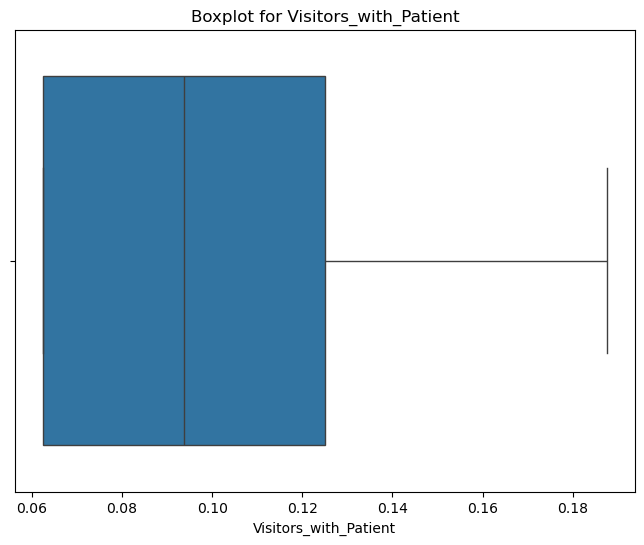

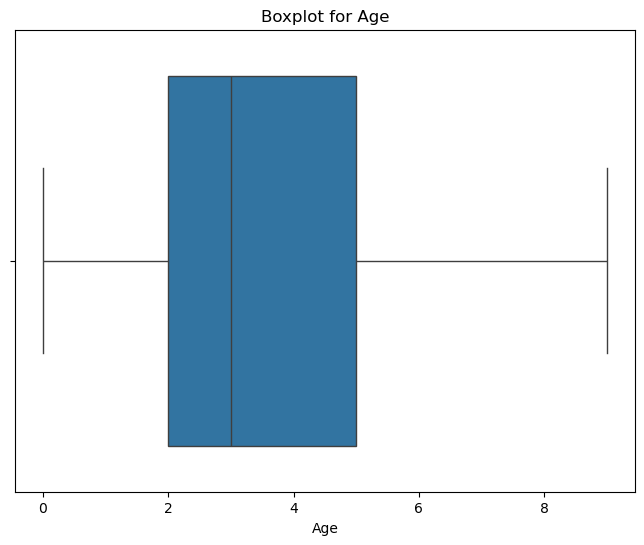

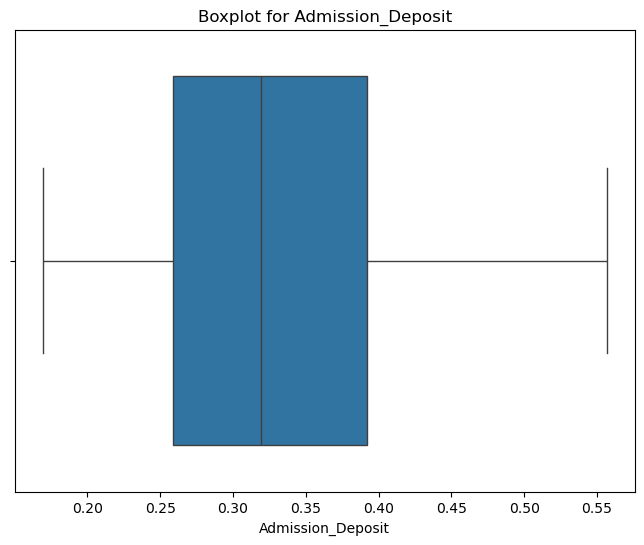

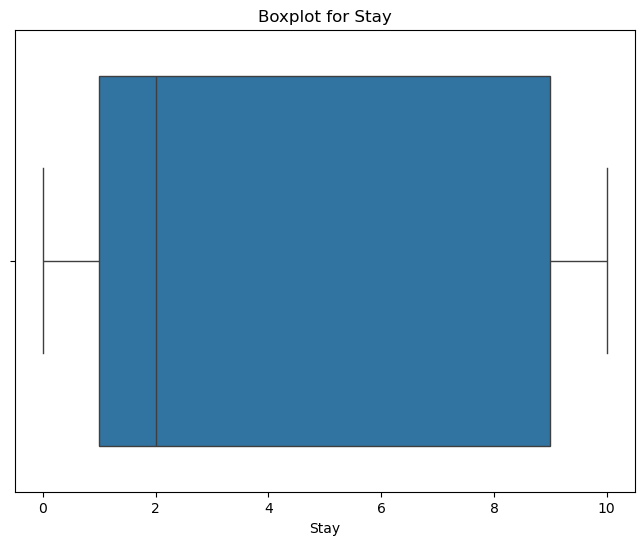

In [33]:
for col in outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

We are done with outliers now moving on to Model Building

# MODEL BUILDING

In [34]:
# Splitting the data
x=df.drop("Stay",axis=1)
y=df["Stay"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [38]:
y_pred_LR = LR.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.292462141860926
Root Mean Squared Error (RMSE): 3.740761105705615


# K_NEAREST NEIGHBORS

In [42]:
# Initialize and train the model
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(x_train, y_train)

# Make predictions
y_pred_knn = knn.predict(x_test)

knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"Mean Absolute Error (MAE): {knn_mae}")
print(f"Root Mean Squared Error (RMSE): {knn_rmse}")

Mean Absolute Error (MAE): 3.3509326717749026
Root Mean Squared Error (RMSE): 4.036762589563192


# HYPER PARAMETER TUNING FOR KNN

In [44]:
param_grid_knn = {
    'n_neighbors': [5, 7],
    'weights': ['uniform']
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='neg_mean_absolute_error'
)

grid_knn.fit(x_train, y_train)

print("Best Parameters for KNN:", grid_knn.best_params_)


Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}


In [46]:
from sklearn.metrics import mean_absolute_error

best_knn = grid_knn.best_estimator_
y_pred_best_knn = best_knn.predict(x_test)

# Evaluate the model using MAE
mae_knn = mean_absolute_error(y_test, y_pred_best_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")

Mean Absolute Error (MAE): 3.32
Root Mean Squared Error (RMSE): 4.036762589563192


After tuning the model also, it is not performing well , so we move on to another model

# DECISION TREE REGRESSOR

In [47]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt.predict(x_test)

# Evaluate the model using MAE and RMSE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")


Mean Absolute Error (MAE): 3.71
Root Mean Squared Error (RMSE): 5.21


# TUNING DECISION TREE MODEL

In [50]:
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Perform grid search
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_absolute_error')
grid_dt.fit(x_train, y_train)

# Get the best estimator
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)

# Calculate MAE and RMSE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Absolute Error (MAE): 3.21
Root Mean Squared Error (RMSE): 3.71


# RANDOM FOREST

In [51]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf.predict(x_test)

# Evaluate the model using MAE and RMSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")


Mean Absolute Error (MAE): 3.23
Root Mean Squared Error (RMSE): 3.78


# Model Comparision Report

__Tuned Decision Tree:__

*MAE: 3.21
*RMSE: 3.71
*Excellent Performance: Has the lowest MAE and RMSE, indicating the most accurate and consistent predictions with the least average error and the least sensitivity to large errors.

__Linear Regression:__

* MAE: 3.29
* RMSE: 3.74
* Very Good Performance: Close to the tuned decision tree, with slightly higher errors. A solid linear model.
  
__Random Forest:__

* MAE: 3.23
* RMSE: 3.78
* Good Performance: MAE is very competitive, but the RMSE is a bit higher than Linear Regression, suggesting it has larger prediction errors.

__Tuned KNN:__

* MAE: 3.32
* RMSE: 4.03
* Decent Performance: Performance is not as good as the top three.
  
__KNN:__

* MAE: 3.35
* RMSE: 4.03
* Lowest Performance: The original KNN model performs the worst, highlighting the importance of hyperparameter tuning.
  
__Decision Tree:__

* MAE: 3.71
* RMSE: 5.21
* Poor Performance: The untuned decision tree has the highest errors, indicating overfitting.

# Compared models to identify the best-performing approach.


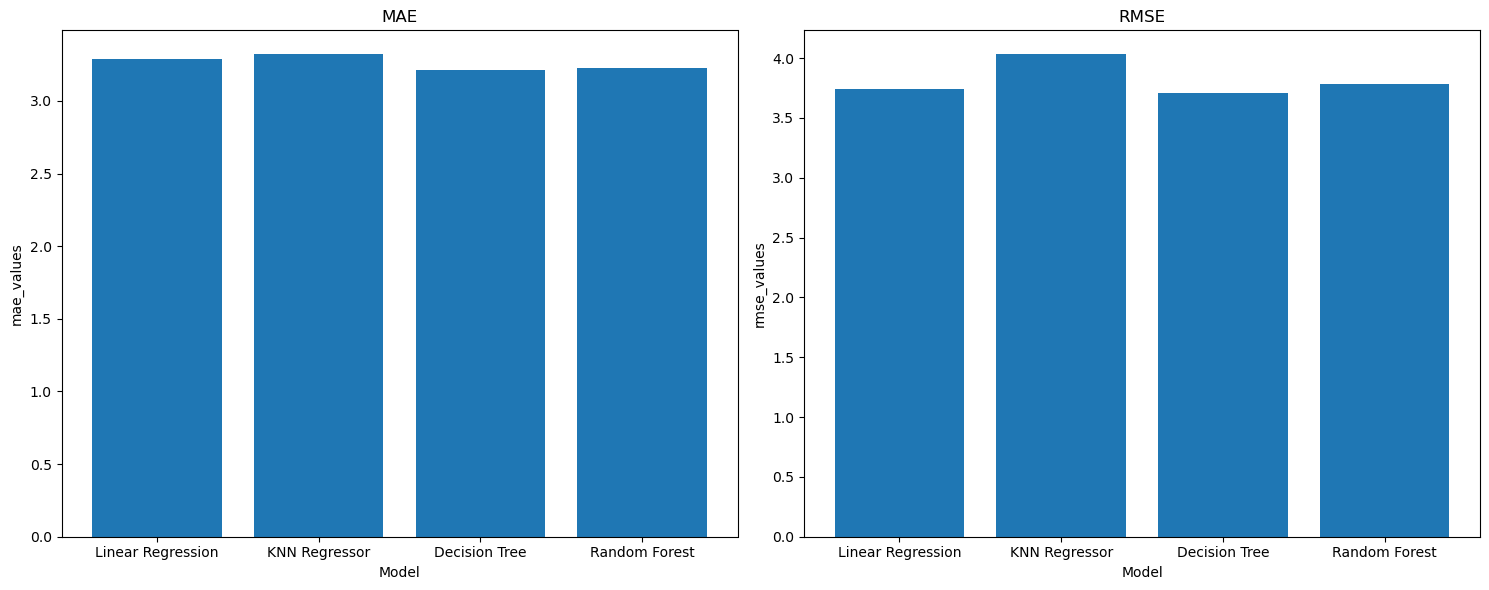

In [56]:
model_names = ['Linear Regression', 'KNN Regressor','Decision Tree', 'Random Forest']

# Define the evaluation metrics for each model
mae_values = [3.29,3.32,3.21,3.23]
rmse_values= [3.74,4.03,3.71,3.78]

# Create a figure and axis object
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].bar(model_names, mae_values)
ax[0].set_title('MAE')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('mae_values')

ax[1].bar(model_names,rmse_values )
ax[1].set_title('RMSE')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('rmse_values')

fig.tight_layout()
plt.show()

# Report on Challenges Faced

__Missing Data:__
* Required cleaning and imputation to avoid bias or data loss.

__Imbalanced Target:__
* Most patients had short stays, making it harder to predict long ones accurately.
  
__Categorical Variables:__
* Several features in the dataset were categorical and needed to be converted into a numerical format suitable for machine learning models.
  
__Interpretability:__
* Balancing model performance with the need for clear, explainable predictions in a healthcare setting.

